In [8]:
import numpy as np
import matplotlib.pylab as plt

In [42]:
def PolynomialRegression(x,y,lr,epochs,degree):
    def poly_data(x,degree):
        poly_x = np.ones([x.shape[0],degree+1])
        for i in range(1,degree+1):
            poly_x[:,i] = x**i
        return poly_x
    m = np.zeros(degree+1)
    poly_x = poly_data(x,degree)

    for _ in range(epochs):
        pred = poly_x.dot(m) # formula pred = x_poly*weight
        error = pred - y
        up_w = 1/len(x)*np.dot(poly_x.T,error) # we use half mse ofr gradiant loss(always)
        if np.any(np.isinf(up_w)) or np.any((np.isnan(up_w))):
            break
        m -= lr*up_w

    return m,pred

In [43]:
x = 4*np.random.rand(100,1)-2
y = 4+2*x+5*x**2+np.random.rand(100,1)

In [64]:
# we use 2 degree because we know that that target variable is 2 degree.
m,pred = PolynomialRegression(x.flatten(),y.flatten(),0.01,500,2)

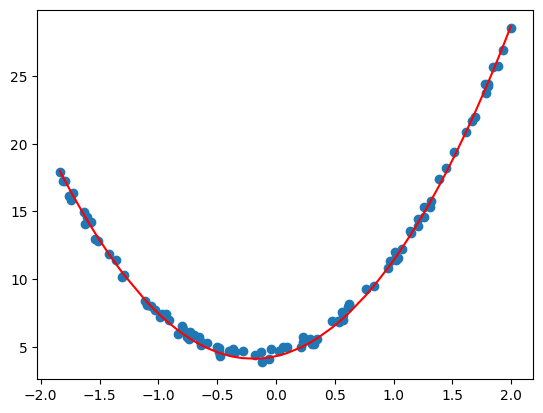

In [65]:
plt.scatter(x,y)
plt.plot(x.flatten()[np.argsort(x.flatten())],pred[np.argsort(x.flatten())],color='r')